# **Causal Modeling FCDO**

This is the script containing the Causal Model for the FCDO project. The installation of relevant packages takes around 20 minutes. For running the causal model there are two options:
- Either take the raw satalite data FCDO_data.csv. This data has not been subjected to basic feature engineering and should be processed according to Prepare Data class function.
- Or take the dimensionality reduced data. This data has been pre processed and the dimensionality has been reduced according to Nonlinear_Dimensionality_Reduction_FCDO.ipynb (also in this repository). 

Specify what data to use in the causal models.

In [6]:
!pip install pandas==1.1.5 &> /dev/nul
!pip install tables==3.5.1 &> /dev/nul
!pip install cdt &> /dev/nul
!pip install rpy2 &> /dev/nul
!sudo apt install graphviz libgraphviz-dev graphviz-dev pkg-config &> /dev/nul
!pip install pygraphviz &> /dev/nul
!pip install pydot &> /dev/nul
!pip install pyparsing==1.5.7 &> /dev/nul
!pip install GML &> /dev/nul
!pip install unidecode &> /dev/nul
!pip install dowhy &> /dev/nul
!pip install statsmodels &> /dev/nul
!pip install pickle-mixin &> /dev/nul
!pip install pyyaml==5.4.1 &> /dev/nul

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


<!DOCTYPE doctype html>
<html lang="en"> <head> <meta charset="utf-8"/> <meta content="ie=edge" http-equiv="x-ua-compatible"/><link href="https://cdn.statically.io/img/htmlsave.com/images/html-save-flat.png?f=auto" rel="icon" type="image/x-icon"/> <meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="noindex" name="robots"><link href="https://cdn.statically.io/gh/savehtml/static/d6fc97f6/errordocstyle.min.css" rel="stylesheet" type="text/css"/> <script src="https://cdn.statically.io/gh/savehtml/static/70997bac/poweredby.js" type="text/javascript"></script></meta></head> <body> <main> <figure> <a href="https://htmlsave.com" rel="dofollow"></a> </figure><title>Error Found</title><section><header><h1>Error Found <a style="color:MediumSeaGreen;">404</a></h1></header><p>The page you were looking for doesn't exist on this server.</p><ul><li><a href="javascript:location.reload();">Try reloading the page</a></li><li><a href="javascript:history.back();">Go back to 
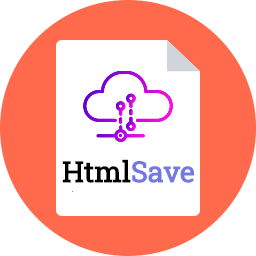

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import tables
import numpy as np
import scipy
import logging.config
import sys
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
import GPUtil
import unidecode
import joblib
import torch
import tqdm
import requests
import difflib as dl
import sklearn
import cdt #CDT depends on a number of other packages, including these R packages: https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/master/r_requirements.txt. 
#Please see below.
from cdt.causality.graph import GES
import networkx as nx
import GML
import pickle
import dowhy
from dowhy import CausalModel
import statsmodels
import statsmodels.api 
from IPython.display import Image, display
from google.colab import auth
from itertools import permutations

In [3]:
base = importr('base')
utils = importr('utils')

utils.chooseCRANmirror(ind=1)
packnames_CRAN_direct = ('devtools', 'BiocManager', 'sparsebn', 'pcalg', 'gRain', 'bnlearn') #Alternatively, 'http://www.bnlearn.com/releases/bnlearn_latest.tar.gz'
names_to_install_CRAN_direct = [x for x in packnames_CRAN_direct if not rpackages.isinstalled(x)]
if len(names_to_install_CRAN_direct) > 0:
    utils.install_packages(StrVector(names_to_install_CRAN_direct))

biocmanager = importr('BiocManager')
packnames_biocmanager = ('graph', 'RBGL', 'Rgraphviz', 'gRain')
names_to_install_biocmanager = [x for x in packnames_biocmanager if not rpackages.isinstalled(x)]
if len(names_to_install_biocmanager) > 0:
    biocmanager.install(StrVector(names_to_install_biocmanager))

devtools = importr('devtools')
packnames_github = ('cran/CAM', 'cran/D2C', 'cran/SID', 'Diviyan-Kalainathan/RCIT')
names_to_install_github = [x for x in packnames_github if not rpackages.isinstalled(x)]
if len(names_to_install_github) > 0:
    devtools.install_github(StrVector(names_to_install_github), force = True)

sparsebn = importr('sparsebn')
pcalg = importr('pcalg')
graph = importr('graph')
rbgl = importr('RBGL')
rgraphviz = importr('Rgraphviz')
bnlearn = importr('bnlearn')
cam = importr('CAM')
d2c = importr('D2C')
sid = importr('SID')
rcit = importr('RCIT')

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Warning:
R[write to console]:  dependencies ‘graph’, ‘RBGL’, ‘Rgraphviz’ are not available

R[write to console]: also installing the dependencies ‘zoo’, ‘DEoptimR’, ‘lmtest’, ‘sparsebnUtils’, ‘ccdrAlgorithm’, ‘discretecdAlgorithm’, ‘abind’, ‘igraph’, ‘ggm’, ‘corpcor’, ‘robustbase’, ‘vcd’, ‘bdsmatrix’, ‘sfsmisc’, ‘fastICA’, ‘clue’, ‘RcppArmadillo’, ‘BH’, ‘gRbase’, ‘RcppEigen’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/zoo_1.8-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 793891 bytes (775 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]

Update all/some/none? [a/s/n]: 

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/backports_1.4.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 26201 bytes (25 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

* checking for file ‘/tmp/RtmpPLo2BN/remotes3f5ebda254/cran-CAM-fbc593d/DESCRIPTION’ ... OK
* preparing ‘CAM’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘CAM_1.0.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo cran/D2C@HEAD

R[write to console]: Skipping 3 packages not available: RBGL, Rgraphviz, graph

R[write to console]: Installing 2 packages: lazy, randomForest

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/lazy_1.2-16.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 21509 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

* checking for file ‘/tmp/RtmpPLo2BN/remotes3f1137bd7e/cran-D2C-482b186/DESCRIPTION’ ... OK
* preparing ‘D2C’:
* checking DESCRIPTION meta-information ... OK
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘D2C_1.2.1.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo cran/SID@HEAD

R[write to console]: Skipping 2 packages not available: graph, RBGL

R[write to console]: Installing 2 packages: ggm, pcalg

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/ggm_2.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 109414 bytes (106 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

* checking for file ‘/tmp/RtmpPLo2BN/remotes3fbb80a24/cran-SID-9e4ab7e/DESCRIPTION’ ... OK
* preparing ‘SID’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘SID_1.0.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo Diviyan-Kalainathan/RCIT@HEAD

R[write to console]: Installing 1 packages: momentchi2

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/momentchi2_0.1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 10133 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

* checking for file ‘/tmp/RtmpPLo2BN/remotes3f260f8867/Diviyan-Kalainathan-RCIT-c97f91c/DESCRIPTION’ ... OK
* preparing ‘RCIT’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘RCIT_0.1.0.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
cdt.SETTINGS.GPU
cdt.SETTINGS.NJOBS
cdt.SETTINGS.NJOBS = 3
cdt.SETTINGS.verbose = False

In [8]:
auth.authenticate_user()

# Import Data
from google.colab import drive
drive.mount('/content/drive')
root = "/content/drive/My Drive/Colab Notebooks/Nino Causal Models/Data/" 
data = pd.read_csv(root+"FCDO_data.csv") # Import prepared data
data_reduced = pd.read_csv(root+"FCDO_data_dim_reduced.csv") # Import prepared data

Mounted at /content/drive


In [9]:
data.columns

Index(['ADM3_EN', 'IDAHO_EPSCOR_TERRACLIMATE_Max_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_SD_Max_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_Mean_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_SD_Mean_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_Min_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Climate_Water_Deficit',
       'ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Bare',
       'ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Bare',
       'ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Potential',
       ...
       'Strategic developments', 'Violence against civilians',
       'total_event_types', '('fatalities', 'Battles')',
       '('fatalities', 'Explosions/Remote violence')',
       '('fatalities', 'Protests')', '('fatalities', 'Riots')',
       '('fatalities', 'Strategic developments')',
       '('fatalities', 'Violence against civilians')',
       '('total_fatalities', '')'],
      dtype='object', length=389)

### **Prepare Data as in Feature Engineering scripts**

This is the feature engineering script that should be used for the raw satatlite data. Note: the dimensionality reduced data set has already been subjected to this before the dimensionality has been reduced.

In the scripts there are choices to be made about how to deal with missing data. Since we are dealing with float data only, we have made the choice to fille the missing data with the mean.

In [10]:
class Prepare_Data:
    def __init__(self, data):
        """
        Class function to preprocess data to data that can we used for feature engineering. Imports the raw data and exports data that 
        immediatly fits random forest model. Since we are using random forest model, it is not necessary to scale data. Random forest models
        ares also able to deal with colinearity within features. Also since there are so many columns we do not rename them yet.
        :param :
        :param :
        """
            # Create logger
        log_format = '%(asctime)s - %(name)s - %(levelname)s - %(funcName)s - %(message)s'
        logging.basicConfig(format=log_format, level=logging.INFO, stream=sys.stdout)
        logger = logging.getLogger()
        self.data = data
        self.logger = logging.getLogger(__name__)

    def prepare_data(self):
        """
        This functions starts the pre processing activities for the random forest model
        :return:
        """
        self.logger.info("start preprocessing data")

        # Change the object types
        self.change_object_type()
        # Deal with awkward column string names
        self.deal_with_string_column_names()
        # Add new features based on range
        self.include_range_data()
        # Deal with missing data
        self.deal_with_missing_data()

        return self.data

    def change_object_type(self):
        """
        Since all the data are floats, we convert the data type.
        :return:
        """

        self.logger.info("start initiating data")
        data = self.data

        # Eliminate all rows where there is no sales price present
        data.replace(['--'], [np.nan], inplace=True)  # replace -- by np.nan
        data.loc[:, data.columns != 'ADM3_EN'] = data.loc[:, data.columns != 'ADM3_EN'].apply(pd.to_numeric, errors='raise')
        self.data=data

    def deal_with_string_column_names(self):
        """
        This functions adjusts column names.
        :return:
        """

        self.logger.info("deal with missing data")
        data = self.data
        
        # #Strip symbols from column names for efficient column selection
        data.columns = data.columns.str.replace("'","")
        data.columns = data.columns.str.replace("''","")
        data.columns = data.columns.str.replace("(","")
        data.columns = data.columns.str.replace(")","")

        self.data = data

    def include_range_data(self):
        """
        Create new features based on range between the minimum and the maximum value of that feature.
        :return:
        """

        self.logger.info("Start adding range features.")
        data = self.data
        
        # Find columns minimums and maximums. (Note: there are no min/max columns (without capital letter))
        min_cols = [col for col in data.columns if 'Min' in col]
        max_cols = [col for col in data.columns if 'Max' in col]
        
        # Find which column from min corresponds with max: #https://docs.python.org/3/library/difflib.html#difflib.get_close_matches
        for min_col in min_cols:
            max_col = dl.get_close_matches(min_col, max_cols, n=1)[0]
            rangename=min_col.replace('Min','Range')
            data[rangename] = data[max_col]-data[min_col]

        self.data=data
        
    def deal_with_missing_data(self):
        """
        This functions deals with missing data and replaces it with the means. 
        :return:
        """

        self.logger.info("deal with missing data")
        data = self.data
        
        #Replace inf by NaN values
        data.replace([np.inf, -np.inf], np.nan, inplace=True)
        
        #Fill NaN values
        data.fillna(data.mean(), inplace=True)
        
        self.data = data

In [11]:
# The raw satalite data should be subject to pre-processing.
pre_processing = Prepare_Data(data)
prepared_data = pre_processing.prepare_data()

2021-12-22 11:19:23,151 - __main__ - INFO - prepare_data - start preprocessing data
2021-12-22 11:19:23,155 - __main__ - INFO - change_object_type - start initiating data
2021-12-22 11:19:24,237 - __main__ - INFO - deal_with_string_column_names - deal with missing data
2021-12-22 11:19:24,261 - __main__ - INFO - include_range_data - Start adding range features.
2021-12-22 11:19:29,914 - __main__ - INFO - deal_with_missing_data - deal with missing data


In [12]:
prepared_data.head(5)

,ADM3_EN,IDAHO_EPSCOR_TERRACLIMATE_Max_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Max_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_Mean_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Mean_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_Min_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Climate_Water_Deficit,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Veget_Transpire,...,ECMWF_ERA5_LAND_MONTHLY_Skin_Range_Temperature,ECMWF_ERA5_LAND_MONTHLY_Skin_SD_Range_Temperature,ECMWF_ERA5_LAND_MONTHLY_Soil_Level1_Range_Temperature_0cm_7cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level1_SD_Range_Temperature_0cm_7cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level2_Range_Temperature_7cm_28cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level2_SD_Range_Temperature_7cm_28cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level3_Range_Temperature_28cm_100cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level3_SD_Range_Temperature_28cm_100cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level4_Range_Temperature_100cm_289cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level4_SD_Range_Temperature_100cm_289cm,ECMWF_ERA5_MONTHLY_0_Percentile_Range_Dew_Temperature,ECMWF_ERA5_MONTHLY_SD_Range_Dew_Temperature,NASA_NOAH01_Range_Soil_Temperature_0cm_10cm,NASA_NOAH01_SD_Range_Soil_Temperature_0cm_10cm,NASA_NOAH01_Range_Soil_Temperature_100cm_200cm,NASA_NOAH01_SD_Range_Soil_Temperature_100cm_200cm,NASA_NOAH01_Range_Soil_Temperature_10cm_40cm,NASA_NOAH01_SD_Range_Soil_Temperature_10cm_40cm,NASA_NOAH01_Range_Soil_Temperature_40cm_100cm,NASA_NOAH01_SD_Range_Soil_Temperature_40cm_100cm,NASA_NOAH01_Range_Surface_Air_Temperature,NASA_NOAH01_SD_Range_Surface_Air_Temperature,NASA_NOAH01_Range_Surface_Radiative_Temperature,NASA_NOAH01_SD_Range_Surface_Radiative_Temperature,IDAHO_EPSCOR_TERRACLIMATE_Range_Vapor_Pressure,IDAHO_EPSCOR_TERRACLIMATE_SD_Range_Vapor_Pressure,IDAHO_EPSCOR_TERRACLIMATE_Range_Vapor_Pressure_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Range_Vapor_Pressure_Deficit,IDAHO_EPSCOR_TERRACLIMATE_Range_Wind_Speed_At10m,IDAHO_EPSCOR_TERRACLIMATE_SD_Range_Wind_Speed_At10m,NASA_NOAH01_Range_Surface_Wind_Speed,NASA_NOAH01_SD_Range_Surface_Wind_Speed,inuncoast_historical_nosub_hist_Coastal_Flood_Range,inuncoast_historical_nosub_hist_Coastal_Flood_SD_Range,inunriverine_historical_nosub_hist_Riverine_Flood_Range,inunriverine_historical_nosub_hist_Coastal_Riverine_SD_Range,hazard_ls_arup_Landslide_Ra

## **Causal Modelling**

In [13]:
class StaticCausalModel:
  # Note this class function mixes cdt functions to extract the causal graph with dowhy functions to identify, estimate and refute the causal effect.
  def __init__(self, data_to_graph, feature_selection, method_parameters, treatment, outcome):
    self.features = feature_selection
    self.data = data_to_graph[self.features]
    self.method_params = method_parameters
    self.Glasso = cdt.independence.graph.Glasso()
    self.ges = cdt.causality.graph.GIES()
    self.treatment = treatment
    self.outcome = outcome

  def networkx_graph(self):
    skeleton = self.Glasso.predict(self.data, alpha=1)#, max_iter=20000)
    return self.ges.predict(self.data, skeleton) 

  def extract_causal_graph(self):
    output_graph = StaticCausalModel.networkx_graph(self)
    nx.write_gml(output_graph, "G.gml")
    # CausalModel is a dowhy function to initiate the model based on the extracted causal graph. 
    return CausalModel(data = self.data, treatment=self.treatment, outcome=self.outcome, graph= 'G.gml') # Note this is the model input required by dowhy

  def return_directed_paths(self):
    DAG = StaticCausalModel.networkx_graph(self)
    combinations = list(permutations(DAG.nodes(), 2))
    return [combination  for combination in combinations if nx.has_path(DAG ,combination[0], combination[1])]

  def return_paths(self, start, end):
    DAG = StaticCausalModel.networkx_graph(self)
    return [path for path in nx.all_simple_paths(DAG ,start, end)]

  def view_graph(self):
    return StaticCausalModel.extract_causal_graph(self).view_model(layout="dot")

  def identification(self):
    return StaticCausalModel.extract_causal_graph(self).identify_effect()

  def estimation(self):
    #Dowhy function estimate_effect to estimate effect. Note we use generalized linear model
    glm_estimate = StaticCausalModel.extract_causal_graph(self).estimate_effect(identified_estimand = StaticCausalModel.identification(self), method_name="backdoor.generalized_linear_model", 
                                                                                test_significance=True, confidence_intervals = True, method_params = self.method_params)
    return glm_estimate, glm_estimate.get_standard_error(method = "bootstrap") 

  def refutation_by_random_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    random_common_cause = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="random_common_cause")
    return random_common_cause

  def refutation_by_bootstrap(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    placebo = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="bootstrap_refuter")
    return placebo

  def refutation_by_data_subset(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    subset=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
    return subset

  def refutation_by_unobserved_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self, treatment, outcome)
    unobserved=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self, treatment, outcome), glm_estimate, method_name="add_unobserved_common_cause", confounders_effect_on_treatment="binary_flip", 
                                         confounders_effect_on_outcome="linear", effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
    return unobserved

In [16]:
# Specify the features to be used. Note that the features for the pre-processed data set differ from the dimensionality reduced features. For an exact mapping look at Nonlinear_Dimensionality_Reduction_FCDO.ipynb
# The top features based on the random forest model together with conflict features are chosen to be included in the causal model, see Random_Forest_Model_FCDO.ipynb
hyp_features_top_RF = ['IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Precipitation_Accumulation','ECMWF_ERA5_LAND_MONTHLY_Max_Low_LeafArea','NASA_NOAH01_Mean_Surface_Wind_Speed',
                              'ECMWF_ERA5_LAND_MONTHLY_Dew_Range_Temperature_2m','ECMWF_ERA5_LAND_MONTHLY_Soil_Level2_SD_Mean_Temperature_7cm_28cm', 'Cattle_SD',
                              'NASA_NOAH01_SD_Range_Soil_Moisture_0cm_10cm',  'ECMWF_ERA5_LAND_MONTHLY_Soil_Level1_SD_Mean_Temperature_0cm_7cm',
                              'NASA_NOAH01_SD_Min_Latent_Heat_Net_Flux', 'NASA_NOAH01_Range_Soil_Heat_Flux','fatalities, Battles','Strategic developments',
                              'Violence against civilians','total_event_types','fatalities, Violence against civilians', 'total_fatalities, ']

dim_reduced_features_top_RF = ['Water_Runoff', 'Soil_Level', 'Soil_Water', 'Precipitation', 'Soil_Level', 'Groundwater_Runoff', 'Temperature', 'Latent_Heat',
                               'Soil_Moisture', 'Evaporation', 'Skin_Reservoir', 'fatalities, Battles','Strategic developments',
                              'Violence against civilians','total_event_types','fatalities, Violence against civilians', 'total_fatalities, ']

                    
# Select which features to chose, the dimensionality reduced or the hypothesized.
data_model = 'dim' # alternatively, 'hyp'

#Select the data to be used for the causal model on hypothesized or dim reduced and choose feature_selection, treatment and outcome accordingly
if data_model == 'dim':
  causal_data = data_reduced
  feature_selection = dim_reduced_features_top_RF
  treatment = 'Water_Runoff'
else:
  feature_selection = hyp_features_top_RF
  treatment = 'IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Precipitation_Accumulation'
  causal_data = prepared_data  

outcome = 'total_fatalities, '

#Select the method parameters
method_parameters = {'num_null_simulations':50, 'method': 'bootstrap', 'num_simulations':50, 'control_value':0, 'treatment_value':1, 
                 'need_conditional_estimates': False, 'fit_method': "statsmodels", 'glm_family':statsmodels.api.families.NegativeBinomial(alpha=0.001)} #Conflicts are sticky. Thus, we use the Negative Binomial distributions. Alternatively, one can use Poisson()

2021-12-22 11:33:39,681 - dowhy.causal_model - INFO - summary - Model to find the causal effect of treatment ['Water_Runoff'] on outcome ['total_fatalities, ']


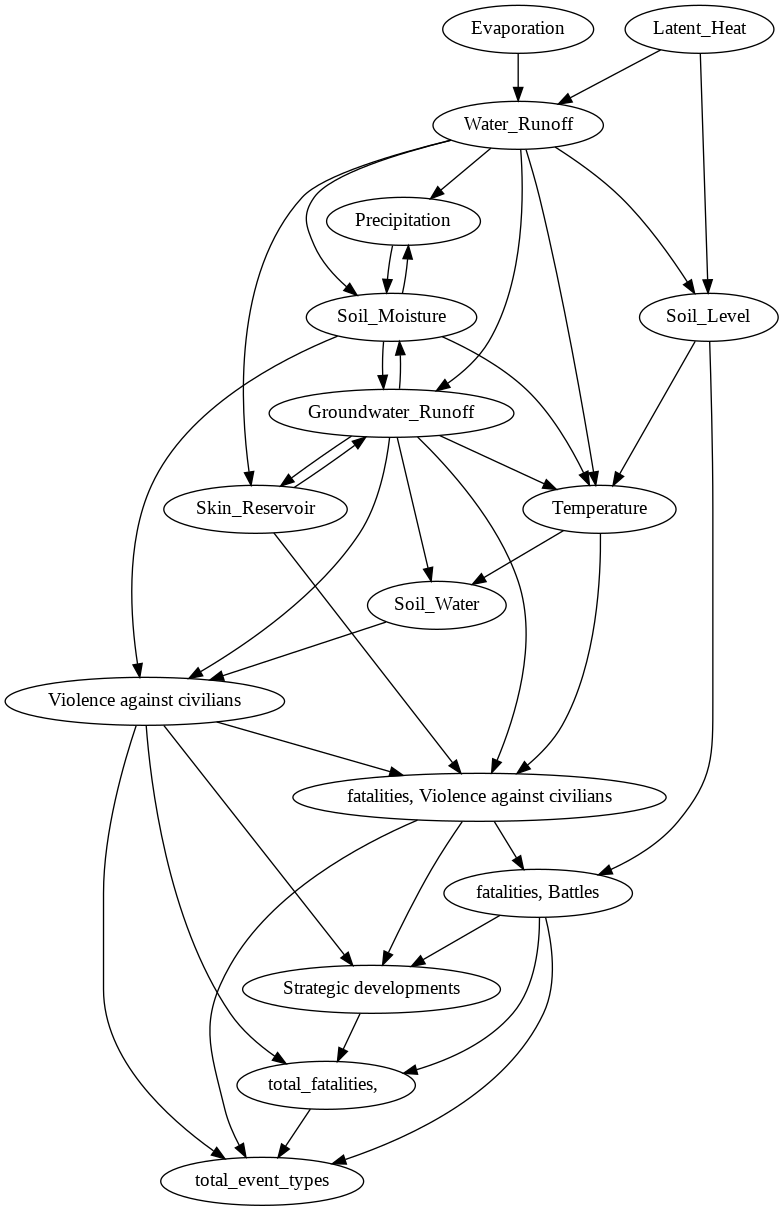

In [20]:
# Initiate Causal Model an view causal graph
causal_model = StaticCausalModel(causal_data, feature_selection, method_parameters, treatment, outcome)
causal_model.view_graph()
display(Image(filename="causal_model.png"))

In [ ]:
# Identify causal effect
identified_effect = causal_model.identification()
print(identified_effect)

In [ ]:
# Estimate causal effect
estimated_effect, standard_error = causal_model.estimation()
print(estimated_effect, f'Standard error of the estimate: {standard_error}.')